In [ ]:
%cd /home/luzinsan/Documents/Obsidian/ML/Innopolis/material/1 semester/HDDA/lecture_notebooks/

# Section 1 - Fisher Iris Data set

In [17]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
# Load the "fisheriris" mat file
mat = scipy.io.loadmat('./content/fisheriris_dataset.mat')
meas = mat['meas']

In [19]:
pd.DataFrame(meas)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# Extract data for each class
x1 = meas[0:50, :]
x2 = meas[50:100, :]
x3 = meas[100:150, :]


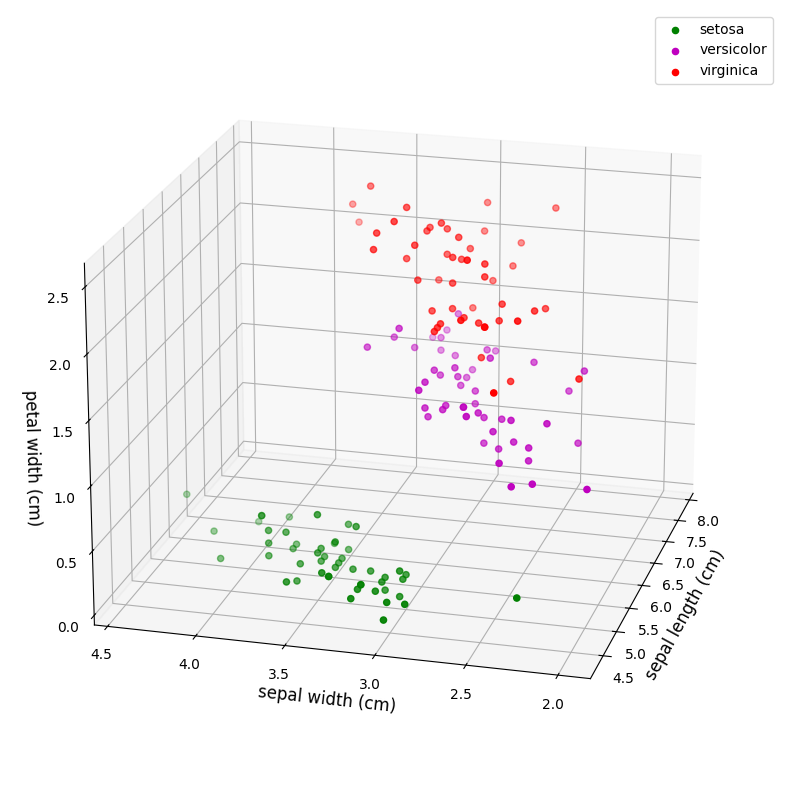

In [20]:
# Plot the data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1[:, 0], x1[:, 1], x1[:, 3], c='g', marker='o', label='setosa')
ax.scatter(x2[:, 0], x2[:, 1], x2[:, 3], c='m', marker='o', label='versicolor')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 3], c='r', marker='o', label='virginica')

ax.view_init(elev=20, azim=-165) #  ax.view_init(elev=20, azim=45) vs ax.view_init(elev=20, azim=-135)


plt.legend()
ax.grid(True)
ax.set_xlabel('sepal length (cm)', fontsize=12)
ax.set_ylabel('sepal width (cm)', fontsize=12)
ax.set_zlabel('petal width (cm)', fontsize=12)
plt.savefig('Fisher_Iris.png', dpi=300)
plt.show()

Fisher iris data set with 150 measurements over three varieties in- cluding 50 measurements each of setosa, versicolor and virginica. Each flower includes a measurement of sepal length, sepal width, petal length and petal width. The first three of these are illustrated here showing that these simple biological features are sufficient to show that the data has distinct, quantifiable differences between the species.

# Section 2 - Dog and Cat

In [21]:
# Import Useful Python libraries
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Import data sets and combine them into one db
dogdata_mat = scipy.io.loadmat('./content/dogData.mat')
catdata_mat = scipy.io.loadmat('./content/catData.mat')

dog = dogdata_mat['dog']
cat = catdata_mat['cat']

CD = np.concatenate((dog,cat),axis=1)
X = CD.T

In [32]:
dog.shape

(4096, 80)

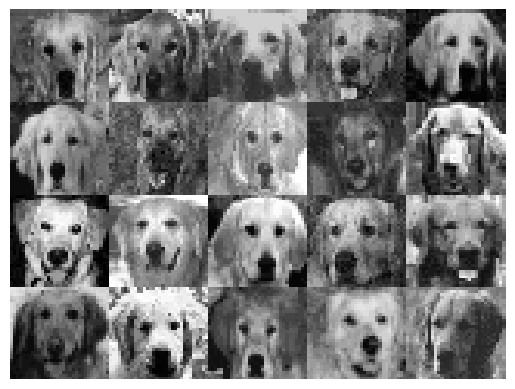

In [34]:
# Display some images of dogs :)
master = np.zeros((32*4,32*5))
count = 0

for jj in range(4):
    for j in range(5):
        T2 = np.flipud(np.reshape(dog[:,count],(64,64)).T)
        T = T2[::2,::2]
        master[32*jj:32*(jj+1),32*j:32*(j+1)] = T
        count += 1

plt.figure()
plt.pcolor(master,cmap='gray')
plt.axis('off')
plt.savefig('Dogs_sel.png', dpi=300)
plt.show()

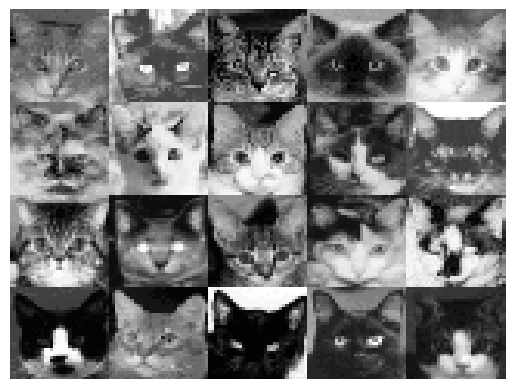

In [35]:
# Display some images of cats :)
master = np.zeros((32*4,32*5))
count = 0

for jj in range(4):
    for j in range(5):
        T2 = np.flipud(np.reshape(cat[:,count],(64,64)).T)
        T = T2[::2,::2]
        master[32*jj:32*(jj+1),32*j:32*(j+1)] = T
        count += 1

plt.figure()
plt.pcolor(master,cmap='gray')
plt.axis('off')
plt.savefig('Cats_sel.png', dpi=300)
plt.show()


In [37]:
# Center the data
Xavg = np.mean(X,axis=0)
[m, n] = X.shape
e = np.ones((m,1))
B = (np.eye(m)-e@e.T/m)@X

In [38]:
# Compute SVD
u,s,vT = np.linalg.svd(B,full_matrices=0)

In [39]:
v = vT.T
print(v.shape)

(4096, 160)


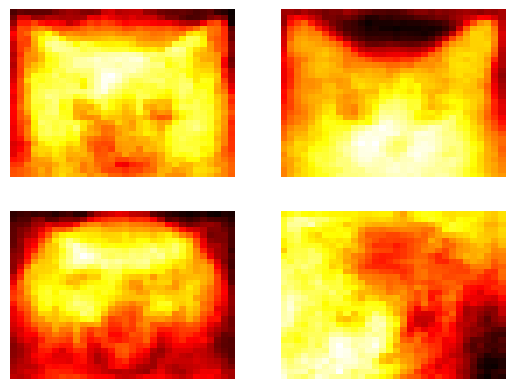

In [48]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
idx = 0
start=0
for j in range(start, start+4):
    V = np.flipud(np.reshape(v[:,j],(64,64)))
    V2 = V[::2,::2]
    axs[idx].pcolor(np.rot90(V2),cmap='hot')
    axs[idx].axis('off')
    idx += 1
plt.savefig('Firstfourfeatures.png', dpi=300)

First four features generated from the SVD of the 160 images of dogs and cats, i.e. these are the first four columns of the V matrix of the SVD.

Note that the first two PC's (two tops) show that the triangular ears are important features when images are correlated.

This is certainly a distinguishing feature for cats, while dogs tend to lack this feature. Thus in feature space, cats generally add these two dominant modes to promote this feature while dogs tend to subtract these features to remove the triangular ears from their representation.

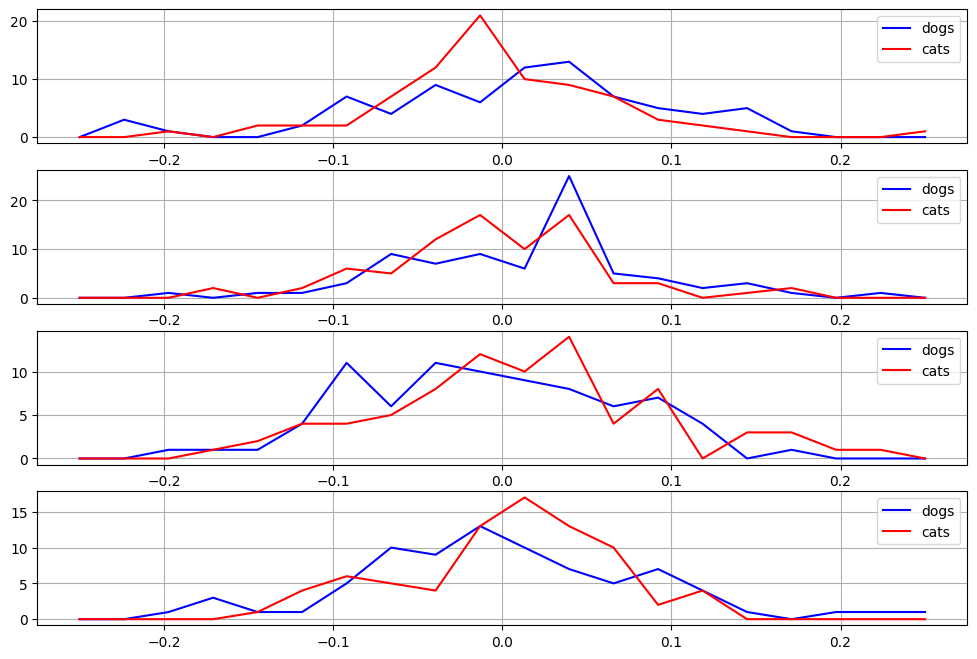

In [56]:
xbin = np.linspace(-0.25,0.25,20)
xbin_edges = np.append(xbin,xbin[-1]+(xbin[1]-xbin[0])) - (xbin[1]-xbin[0])/2
fig,axs = plt.subplots(4,1)
colors = ['blue', 'red']
labels = ['dogs','cats']
plt.rcParams['figure.figsize'] = [12, 8]  # Adjust the figure size as needed
start = 12
idx = 0
for j in range(start, start+4):
    pdf1 = np.histogram(u[:80,j],bins=xbin_edges)[0]
    pdf2 = np.histogram(u[80:,j],bins=xbin_edges)[0]
    axs[idx].plot(xbin,pdf1,color=colors[0],label=labels[0])
    axs[idx].plot(xbin,pdf2,color=colors[1],label=labels[1])
    axs[idx].legend(prop={'size': 10})
    axs[idx].grid(True)
    idx += 1


plt.savefig('histo_dogs_cats.png', dpi=300)

Histogram of the distribution of loadings for dogs (blue) and cats (red) on the first four dominant PC's.

Note the good separability between dogs and cats using the second mode.

Better separability can be obtained by using instead of the raw images their wavelet transforms. In that cases, the fourth PC becomes a also a separation direction between dogs and cats,

# Section 3 - Supervised vs Unsupervised

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [58]:
# Training and test set sizes
n1 = 100 # Training set size
n2 = 50  # Test set size

# Random ellipse 1 centered at (-2,0)
x = np.random.randn(n1+n2) - 2
y = 0.5*np.random.randn(n1+n2)

# Random ellipse 5 centered at (1,0)
x5 = 2*np.random.randn(n1+n2) + 1
y5 = 0.5*np.random.randn(n1+n2)

# Random ellipse 2 centered at (2,-2)
x2 = np.random.randn(n1+n2) + 2
y2 = 0.2*np.random.randn(n1+n2) - 2

# Rotate ellipse 2 by theta
theta = np.pi/4
A = np.zeros((2,2))
A[0,0] = np.cos(theta)
A[0,1] = -np.sin(theta)
A[1,0] = np.sin(theta)
A[1,1] = np.cos(theta)

x3 = A[0,0]*x2 + A[0,1]*y2
y3 = A[1,0]*x2 + A[1,1]*y2

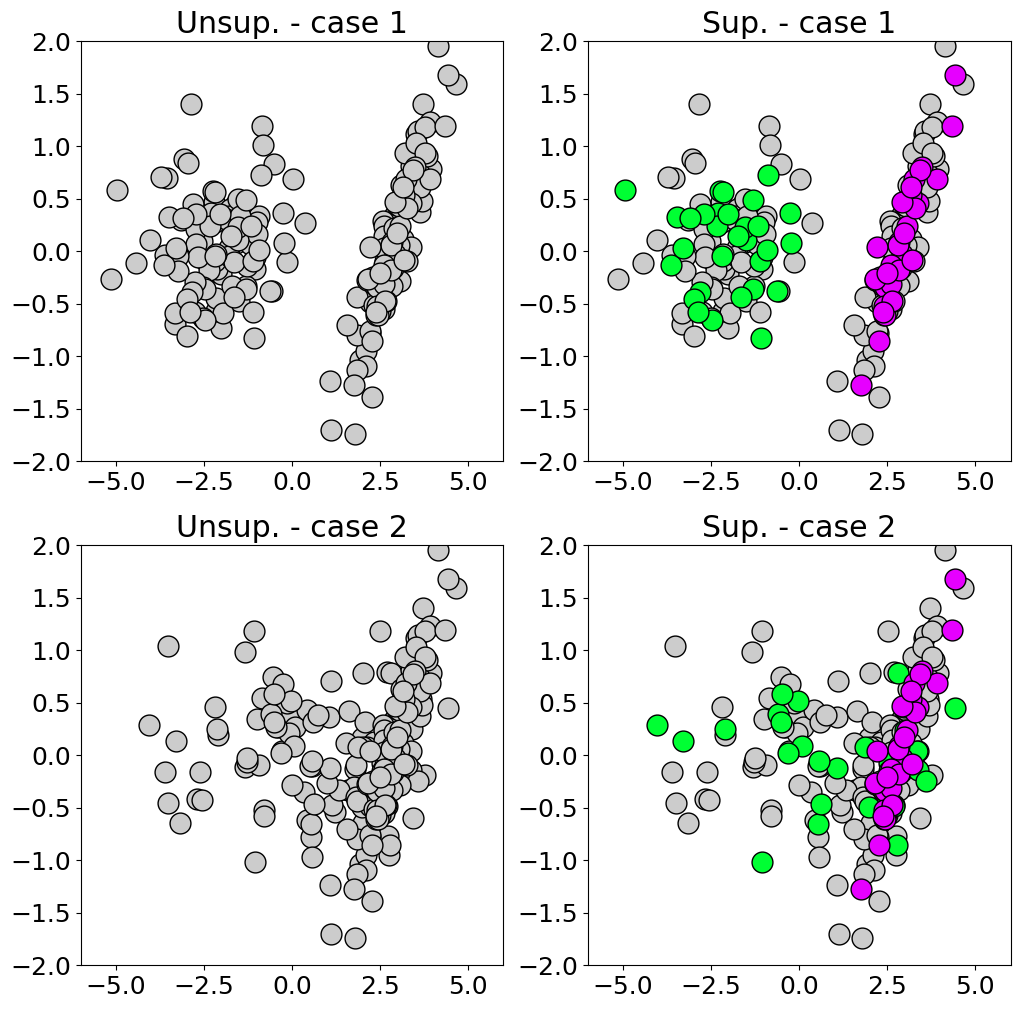

In [59]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].plot(x[:n1],y[:n1],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[0].plot(x3[:n1],y3[:n1],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[0].title.set_text('Unsup. - case 1')


axs[1].plot(x[:70],y[:70],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[1].plot(x3[:70],y3[:70],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[1].plot(x[70:100],y[70:100],'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=15)
axs[1].plot(x3[70:100],y3[70:100],'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=15)
axs[1].title.set_text('Sup. - case 1')

axs[2].plot(x5[:n1],y5[:n1],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[2].plot(x3[:n1],y3[:n1],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[2].title.set_text('Unsup. - case 2')

axs[3].plot(x5[:70],y5[:70],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[3].plot(x3[:70],y3[:70],'o',markerfacecolor=(0.8,0.8,0.8),markeredgecolor='k',ms=15)
axs[3].plot(x5[70:100],y5[70:100],'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=15)
axs[3].plot(x3[70:100],y3[70:100],'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=15)
axs[3].title.set_text('Sup. - case 2')

for ax in axs:
    ax.set_xlim(-6,6)
    ax.set_ylim(-2,2)

plt.savefig('supvsunsup.png', dpi=300)
plt.show()

Illustration of unsupervised versus supervised learning. In the left panels, unsupervised learning attempts to find clusters for the data in order to classify them into two groups. For well separated data (top-left), the task is straightforward and labels can easily be produced. For overlapping data (bottom-left), it is a very difficult task for an unsupervised algorithm to accomplish. In the right panels, supervised learning provides a number of labels: green balls and magenta balls. The remaining unlabeled data is then classified as green or magenta. For well separated data (top-right), labeling data is easy, while overlapping data presents significant challenge.


# Section 4 - difficulty generalizing

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

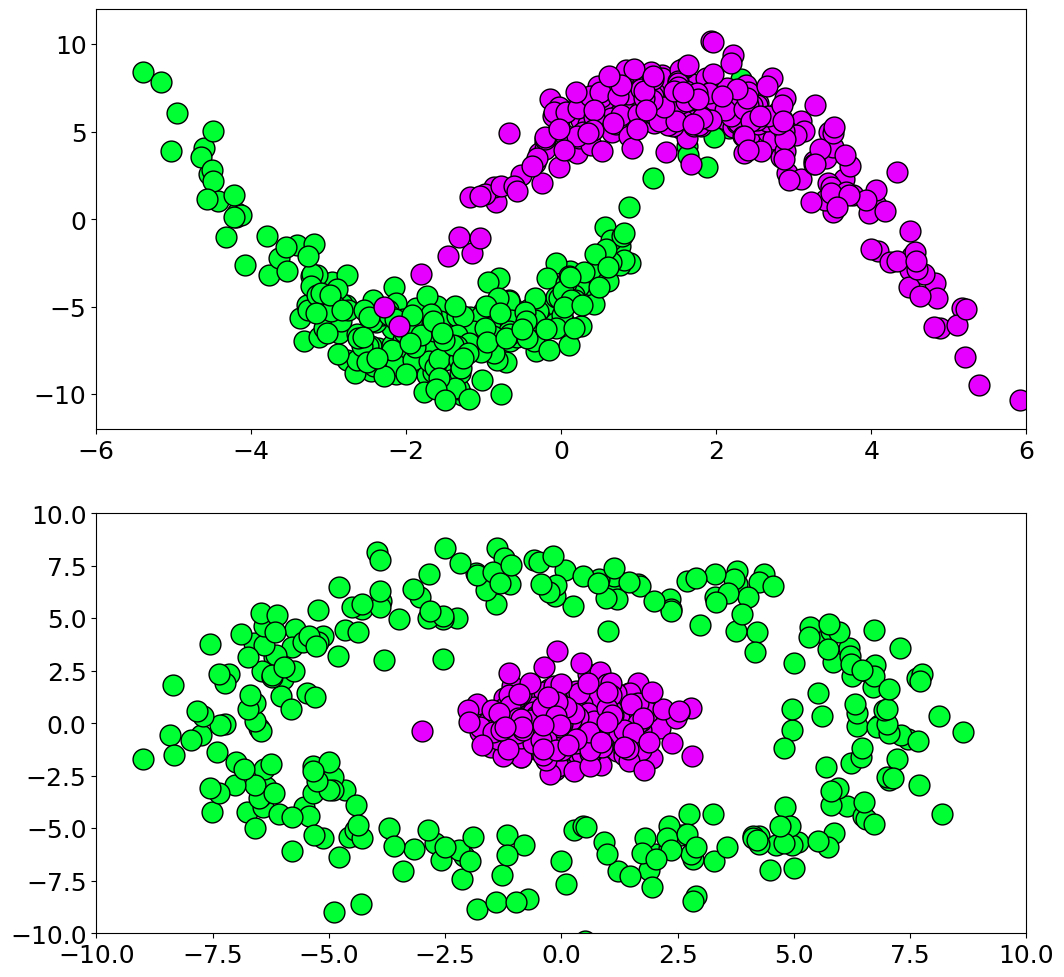

In [61]:
n1 = 300 # training set size
x1 = 1.5*np.random.randn(n1)-1.5
y1 = 1.2*np.random.randn(n1)+np.power(x1+1.5,2)-7
x2 = 1.5*np.random.randn(n1)+1.5
y2 = 1.2*np.random.randn(n1)-np.power(x2-1.5,2)+7

fig,axs = plt.subplots(2)
axs[0].plot(x1,y1,'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=15)
axs[0].plot(x2,y2,'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=15)
axs[0].set_xlim(-6,6)
axs[0].set_ylim(-12,12)

r = 7 + np.random.randn(n1)
th = 2*np.pi*np.random.randn(n1)
xr = r * np.cos(th)
yr = r * np.sin(th)

x5 = np.random.randn(n1)
y5 = np.random.randn(n1)

axs[1].plot(xr,yr,'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=15)
axs[1].plot(x5,y5,'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=15)
axs[1].set_xlim(-10,10)
axs[1].set_ylim(-10,10)

plt.show()

These data sets, although easily classified and clustered through visual inspection can be difficulty for many regression and classification schemes.

In this case, the non-linear function separating the green and magenta balls can be difficult to extract.

More- over, if only a small sample of the data $\mathcal{D}^{'}$ is available, then a generalizable model may be impossible to construct for $\mathcal{D}$. The top data set represents two half-moon shapes that are just superimposed while the concentric rings in bottom requires a circle as a separation boundary between the data.

# Section 5 - Voronoi diagram

In [ ]:
# Example from https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.voronoi_plot_2d.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

In [ ]:
# Create a set of points for the example:
rng = np.random.default_rng()
points = rng.random((10,2))

In [ ]:
# Generate the Voronoi diagram for the points:
vor = Voronoi(points)

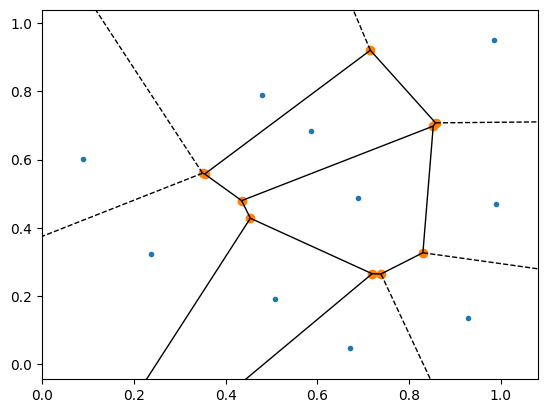

In [ ]:
# Use voronoi_plot_2d to plot the diagram:
fig = voronoi_plot_2d(vor)

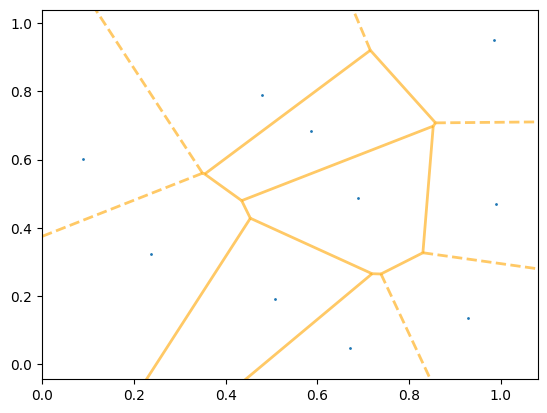

In [ ]:
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                      line_width=2, line_alpha=0.6, point_size=2)
plt.show()

# Section 6 - Dendogram

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [ ]:
# Training and testing set sizes
n1 = 100 # Train
n2 = 50  # Test

# Random ellipse 1 centered at (0,0)
x = np.random.randn(n1+n2)
y = 0.5*np.random.randn(n1+n2)

# Random ellipse 2 centered at (1,-2)
x2 = np.random.randn(n1+n2) + 1
y2 = 0.2*np.random.randn(n1+n2) - 2

# Rotate ellipse 2 by theta
theta = np.pi/4
A = np.zeros((2,2))
A[0,0] = np.cos(theta)
A[0,1] = -np.sin(theta)
A[1,0] = np.sin(theta)
A[1,1] = np.cos(theta)

x3 = A[0,0]*x2 + A[0,1]*y2
y3 = A[1,0]*x2 + A[1,1]*y2

Next Figure shows the data under consideration. Vi- sual inspection shows two clear clusters that are easily discernible.

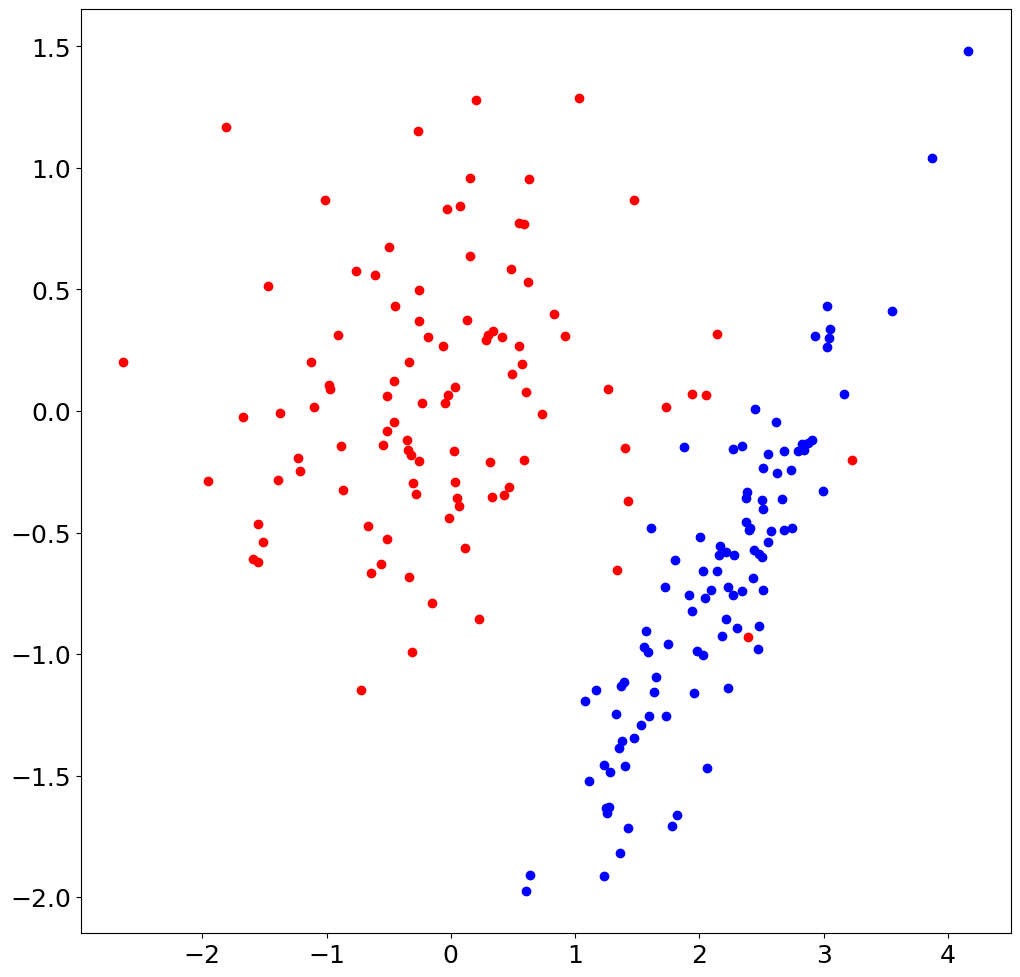

In [ ]:
plt.figure()
plt.plot(x[:n1],y[:n1],'ro')
plt.plot(x3[:n1],y3[:n1],'bo')
plt.show()

In [ ]:
# Training set: first 200 of 240 points
X1 = np.column_stack((x3[:n1],y3[:n1]))
X2 = np.column_stack((x[:n1],y[:n1]))

Y = np.concatenate((X1,X2))
Z = np.column_stack((np.ones(n1),2*np.ones(n1)))

# Test set: remaining 40 points
x1test = np.column_stack((x3[n1:],y3[n1:]))
x2test = np.column_stack((x[n1:],y[n1:]))

Next Figure shows the dendrogram associated with the data

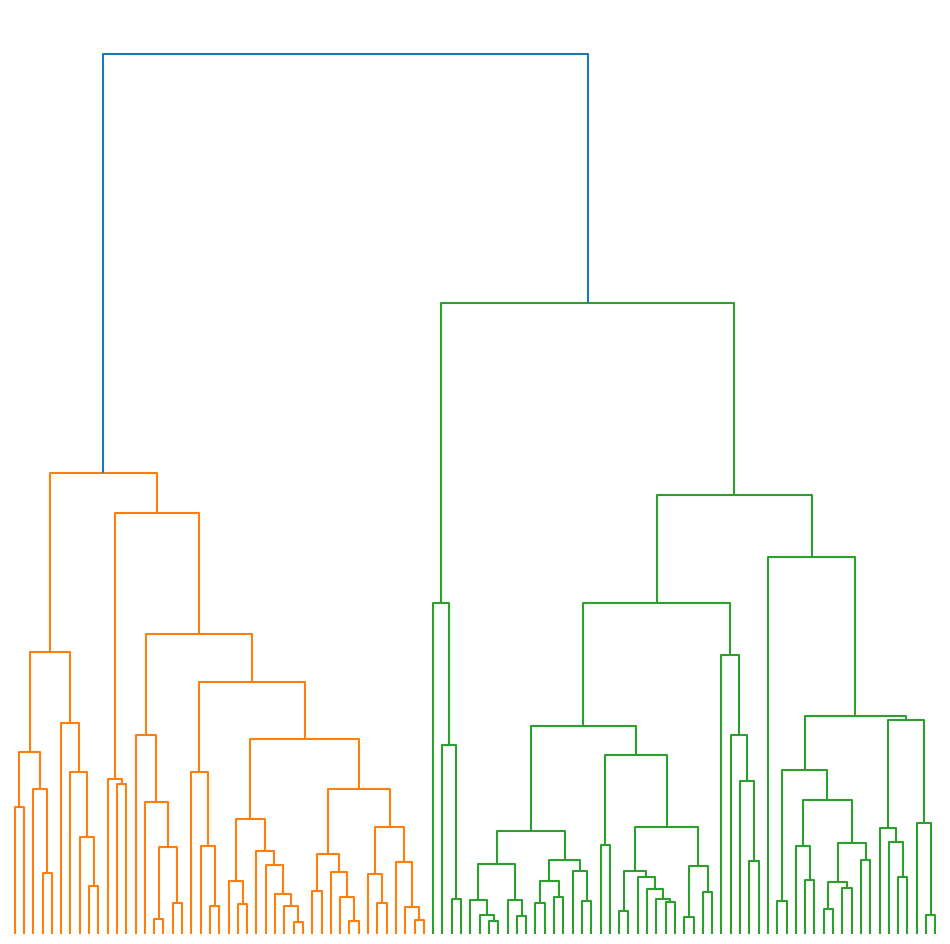

In [ ]:
## Dendrograms

Y3 = np.concatenate((X1[:50,:],X2[:50,:]))

Y2 = pdist(Y3,metric='euclidean')
Z = hierarchy.linkage(Y2,method='average')
thresh = 0.85*np.max(Z[:,2])

plt.figure()
dn = hierarchy.dendrogram(Z,p=100,color_threshold=thresh)
plt.axis('off')

plt.show()

The threshold command is important in labeling where each point belongs in the hierarchical scheme. By setting the threshold at different levels, there can be more or fewer clusters in the dendrogram. \\

The dendrogram shows which points are merged as well as the distance between points. Two clusters are generated for this level of threshold.

Next Figure shows how the data was clustered in the dendrogram. If perfect clustering had been achieved, then the first 50 points would have been below the horizontal dotted red line while the second 50 points would have been above the horizontal dotted red line. The vertical dotted red line is the line separating the green dots on the left from the magenta dots on the right.

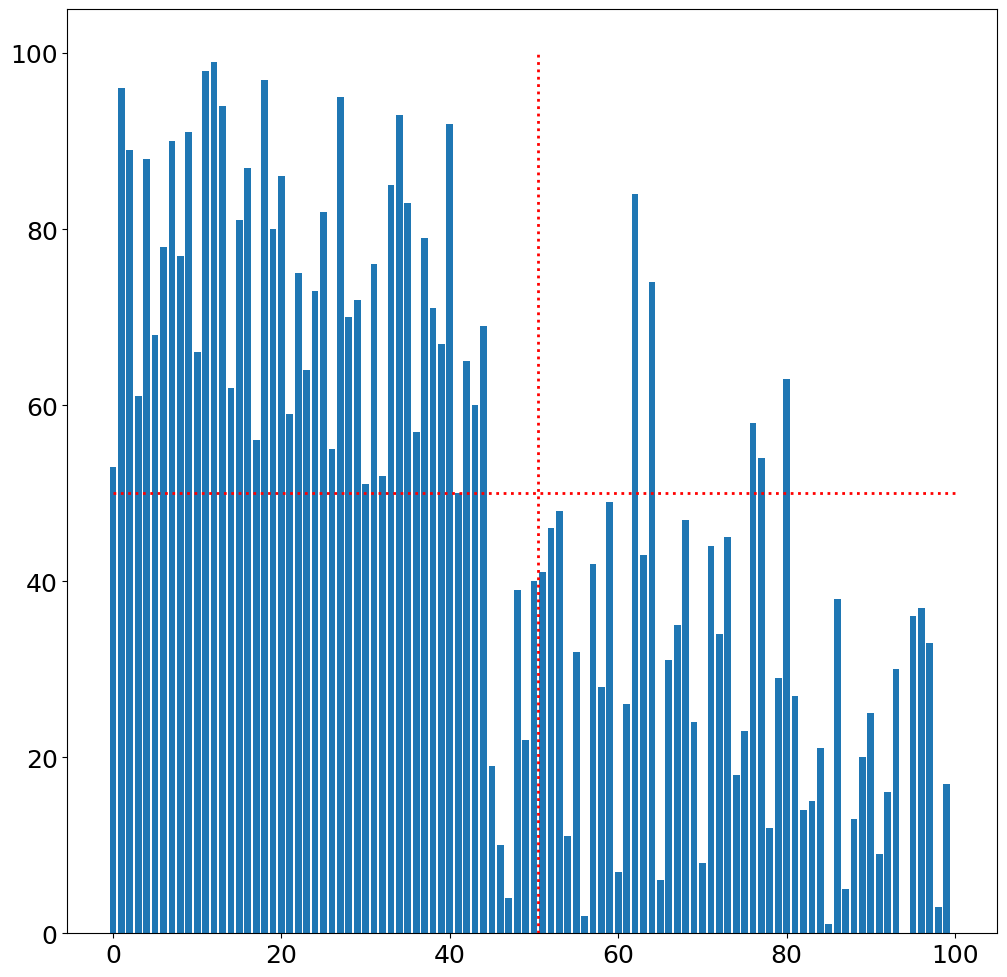

In [ ]:
plt.bar(range(100),dn['leaves'])
plt.plot(np.array([0, 100]),np.array([50, 50]),'r:',linewidth=2)
plt.plot(np.array([50.5, 50.5]),np.array([0, 100]),'r:',linewidth=2)

plt.show()

Next Figure shows a new dendrogram with a different threshold. Note that in this case, the hierarchical clustering produces more than a dozen clusters. The tuning parameter can be seen to be critical for unsupervised clustering, much like choosing the number of clusters in k-means. In summary, both k-means and hierarchical clustering provide a method whereby data can be parsed automatically into clusters. This provides a starting point for interpre- tations and analysis in data mining.


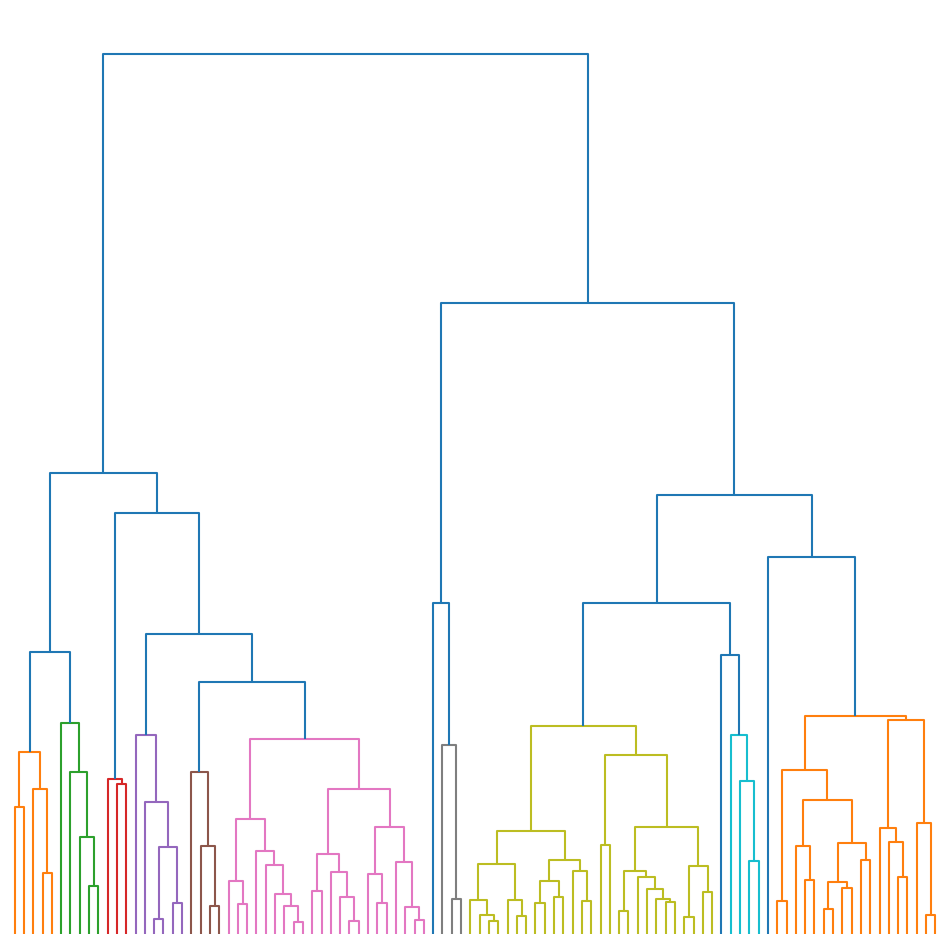

In [ ]:
thresh = 0.25*np.max(Z[:,2])

plt.figure()
dn = hierarchy.dendrogram(Z,p=100,color_threshold=thresh)
plt.axis('off')
plt.show()